In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
reddit = pd.read_csv('reddit_data_example.csv')
reddit.head()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio
0,2/9/2023 20:12,reddit.com,neutral,en,AutoModerator,reply,2397363,0,2000,NaN,1,NaN
1,2/9/2023 17:42,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
2,2/9/2023 17:41,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
3,2/8/2023 22:12,reddit.com,negative,en,KaylaST,reply,110,14,1470,NaN,1,NaN
4,2/8/2023 20:15,reddit.com,negative,en,CaveLady3000,post,311,73,4148,0.0,1,1.0


In [3]:
reddit.shape

(8137, 12)

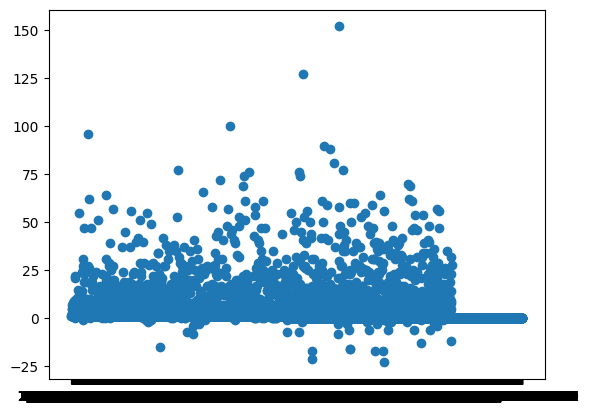

In [4]:
fig1, ax1 = plt.subplots()
ax1.scatter(reddit['Date'], reddit['Reddit Score'])
plt.show()

In [5]:
reddit['datetime'] = pd.to_datetime(reddit['Date'])

In [6]:
reddit['datetime'].describe()

count                             8137
mean     2021-01-23 20:13:32.444389632
min                2017-06-20 00:01:00
25%                2020-04-24 13:16:00
50%                2020-09-07 18:14:00
75%                2021-11-29 14:46:00
max                2023-02-09 20:12:00
Name: datetime, dtype: object

In [8]:
reddit['datetime'].dt.date[0:10]

0    2023-02-09
1    2023-02-09
2    2023-02-09
3    2023-02-08
4    2023-02-08
5    2023-02-08
6    2023-02-08
7    2023-02-08
8    2023-02-08
9    2023-02-08
Name: datetime, dtype: object

In [9]:
reddit['datetime'].dt.to_period('M')[0:10]

0    2023-02
1    2023-02
2    2023-02
3    2023-02
4    2023-02
5    2023-02
6    2023-02
7    2023-02
8    2023-02
9    2023-02
Name: datetime, dtype: period[M]

In [10]:
reddit_daily_comment_count = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()
reddit_daily_comment_count.iloc[0:10]

datetime
2017-06-20     1
2017-07-08     1
2019-07-09     4
2019-07-10     2
2019-07-11     1
2019-07-12     1
2019-07-14     4
2019-07-15     2
2019-07-16    10
2019-07-17    10
Name: Reddit Score, dtype: int64

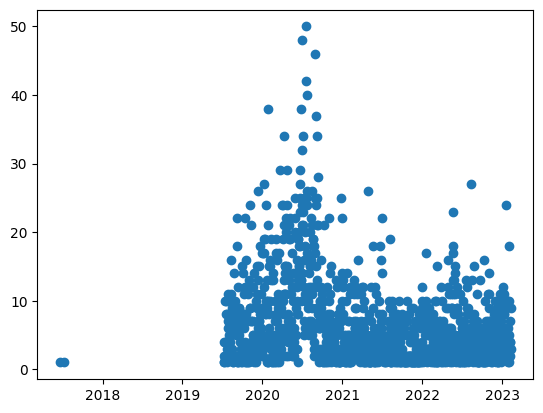

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(reddit_daily_comment_count.index, reddit_daily_comment_count)
plt.show()

In [12]:
reddit['datetime'].describe()['min'], reddit['datetime'].describe()['max']

(Timestamp('2017-06-20 00:01:00'), Timestamp('2023-02-09 20:12:00'))

In [13]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='D')

In [14]:
date_range

DatetimeIndex(['2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29',
               ...
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09'],
              dtype='datetime64[ns]', length=2061, freq='D')

In [15]:
rds = pd.Series(reddit_daily_comment_count, index = date_range)

In [16]:
rds.fillna(0)

2017-06-20    1.0
2017-06-21    0.0
2017-06-22    0.0
2017-06-23    0.0
2017-06-24    0.0
             ... 
2023-02-05    4.0
2023-02-06    2.0
2023-02-07    7.0
2023-02-08    9.0
2023-02-09    3.0
Freq: D, Name: Reddit Score, Length: 2061, dtype: float64

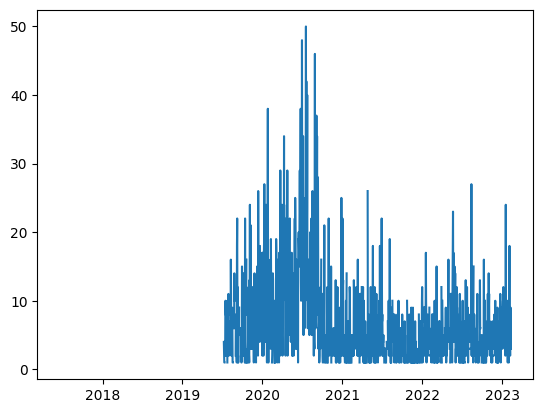

In [17]:
fig3, ax3 = plt.subplots()
ax3.plot(rds.index, rds)
plt.show()

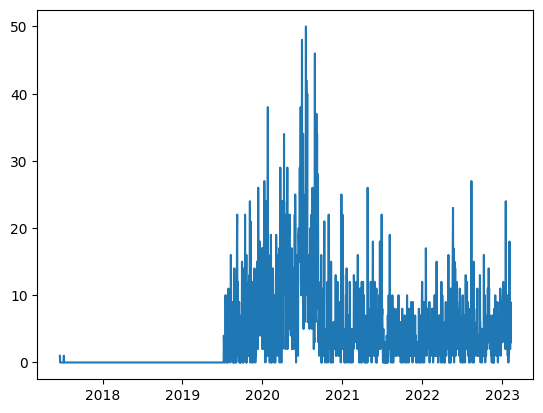

In [18]:
fig4, ax4 = plt.subplots()
ax4.plot(rds.index, rds.fillna(0))
plt.show()

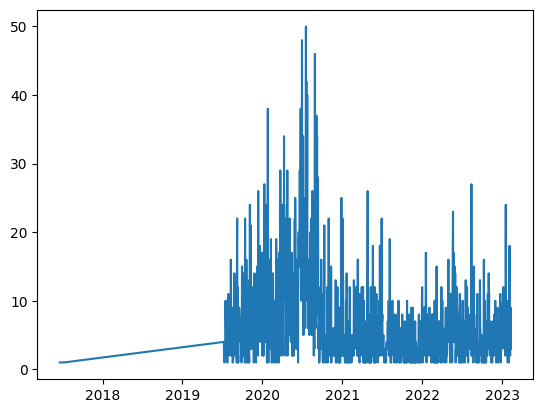

In [19]:
fig5, ax5 = plt.subplots()
ax5.plot(rds.index, rds.interpolate(method='time'))
plt.show()